In [2]:
from collections import *
from numpy import *
import numpy as np
import csv
import sys
import json
import re
import nltk.data
import string
import sklearn.cluster
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import xml.etree.ElementTree as ET
import sklearn.decomposition
import song_parsing
import collections
import sklearn.feature_extraction.text
from sklearn.decomposition import PCA
csv.field_size_limit(sys.maxsize);

In [36]:
N_CLUSTERS = 5

def get_all_words_and_word_counts(songs):
    all_words = set([])
    song_counters = {}
    for song in songs:
        words = []
        for line in songs[song].split('\n'):
            line = line.translate(None, string.punctuation)
            words.extend(line.replace('"', '').split(' '))

        counter = collections.Counter(words)
        song_counters[song] = counter
        all_words = all_words.union( counter.iterkeys() )

    length = len(all_words)
    all_words = sorted(all_words)
    return all_words, song_counters
    
def get_all_representations_as_matrix(songs, song_counters, all_words):
    all_song_representations = [[] for i in range(len(songs))]
    for word in all_words:
        for song_index, song in enumerate(songs):
            all_song_representations[song_index].append(song_counters[song[0]][word] * 1.0) 
    return all_song_representations
    
def get_clusters(songs):
    all_words, song_counters = get_all_words_and_word_counts(songs)
    songs = list(songs.iteritems())

    clusterer = sklearn.cluster.KMeans(n_clusters=N_CLUSTERS, max_iter=500) #make max_iter higher later

    all_song_representations = get_all_representations_as_matrix(songs, song_counters, all_words)
    
    #TF-IDF
    tfidf = sklearn.feature_extraction.text.TfidfTransformer(norm='l2',smooth_idf=True)
    communities = tfidf.fit_transform(all_song_representations).toarray()

    # #SVD
    svd = sklearn.decomposition.TruncatedSVD(n_components=N_CLUSTERS)
    all_song_representations = svd.fit_transform(all_song_representations)

    all_song_representations = np.array(all_song_representations) # as NP array
    cluster_labels = clusterer.fit_predict(all_song_representations)
    
    clusters = {}
    for song_index, cluster in enumerate(cluster_labels):
        if cluster not in clusters:
            clusters[cluster] = []
        else:
            clusters[cluster].append(songs[song_index][0])
    return all_song_representations, clusters, cluster_labels

In [37]:
songs = song_parsing.get_all_song_lyrics("Taylor Swift")
all_song_representations, clusters, cluster_labels = get_clusters(songs)

In [38]:
svd = sklearn.decomposition.TruncatedSVD(n_components=2)
t = pca2.fit_transform(all_song_representations)

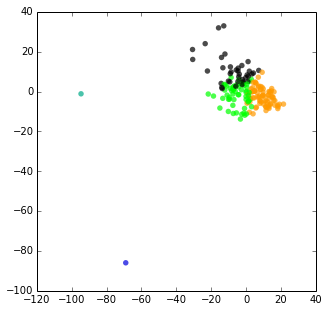

In [39]:
%matplotlib inline
plt.figure(figsize=(5,5))
colors = cm.spectral(cluster_labels.astype(float) / N_CLUSTERS)
plt.scatter(t[:, 0], t[:, 1], marker='.', s=120, lw=0, alpha=0.7, c=colors)
plt.show()

In [40]:
print collections.Counter(cluster_labels)
for cluster in clusters:
    print clusters[cluster]

Counter({4: 77, 3: 56, 0: 38, 1: 1, 2: 1})
['All You Had To Do Was Stay', 'Need You Now', 'Stay Stay Stay', '22', 'Never Grow Up', 'Everything Has Changed', 'Nevermind', 'Welcome To New York', 'The Lucky One', 'Til Brad Pitt Comes Along', 'Drops Of Jupiter', 'Enchanted', 'Jump Then Fall', 'This Here Guitar', 'Firefly', 'Better Than Revenge', 'You Belong With Me', "Ain't Nothing 'Bout You", 'Hey Stephen', "Baby, Don't You Break My Heart Slow", 'Permanent Marker', 'I Knew You Were Trouble (Remix)', 'My Turn To Be Me', 'Tell Me Why', 'Tell Me', 'The Last Time', 'How You Get The Girl', 'Stupid Boy', 'Treacherous', 'Under My Head', "You're Not Sorry", 'What Do You Say', 'Revenge', 'We Are Never Ever Getting Back Together', 'Invisible', 'Mean', 'Last Christmas']
[]
[]
['One Way Ticket', 'Breathe', 'Spinning Around', 'If This Was A Movie', 'Back To December', 'Writing Songs About You', 'I Wished On A Plane', 'Begin Again', 'The Way I Loved You', 'Last Kiss', 'Am I Ready For Love', 'I Heart ?'

In [ ]:
print len(songs)